<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%202.10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
pip install scikit-fuzzy

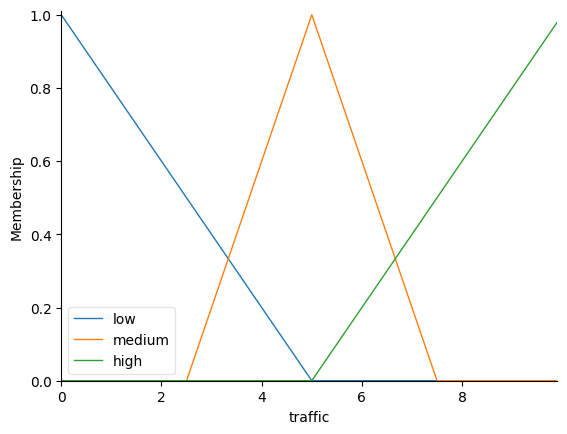

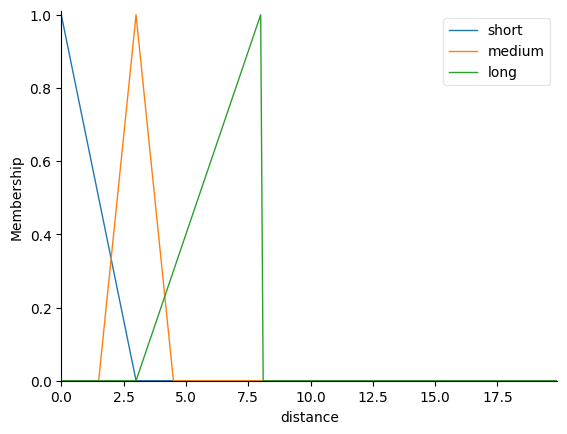

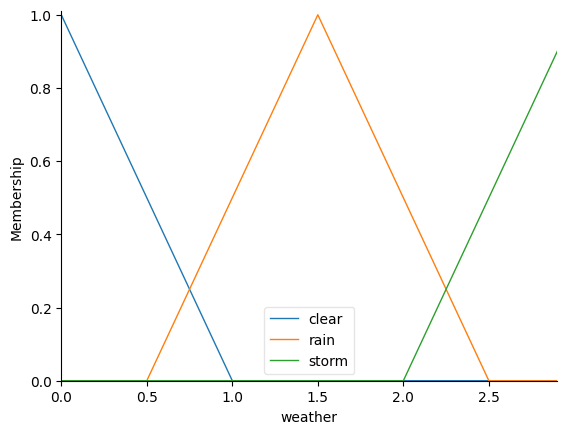

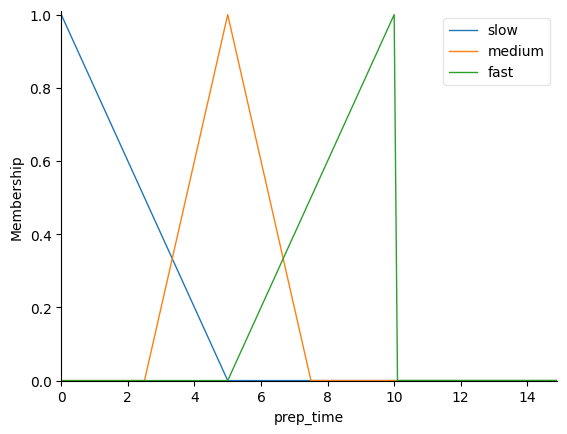

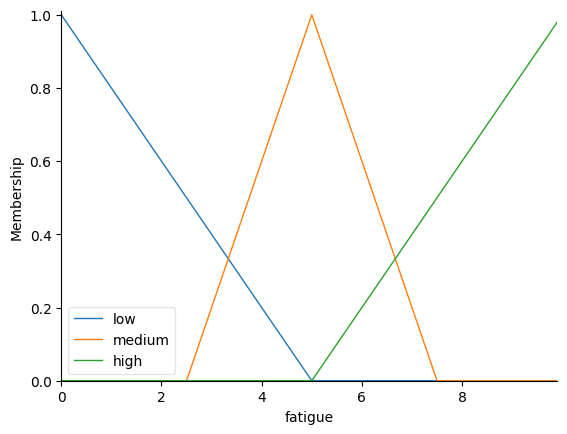

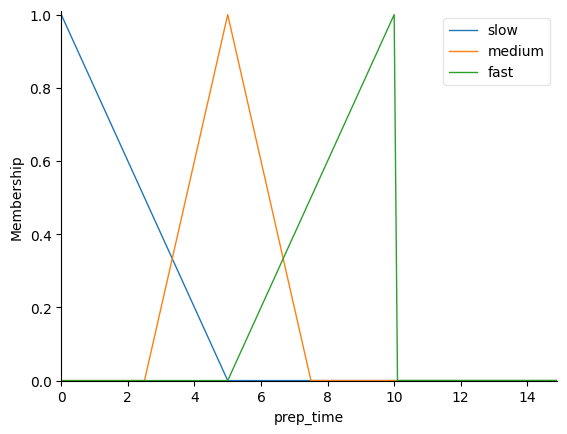

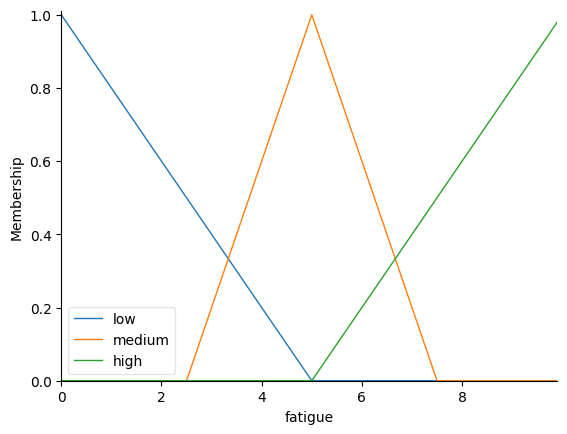

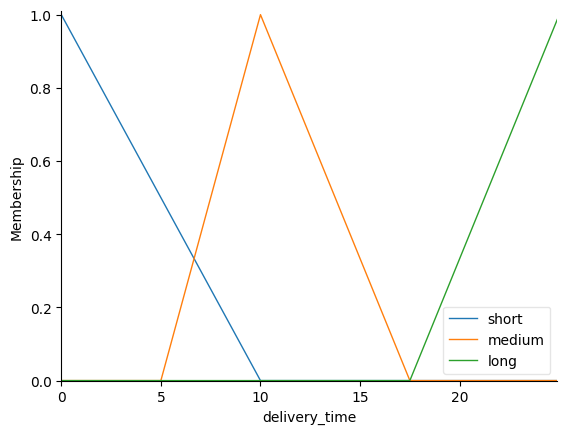

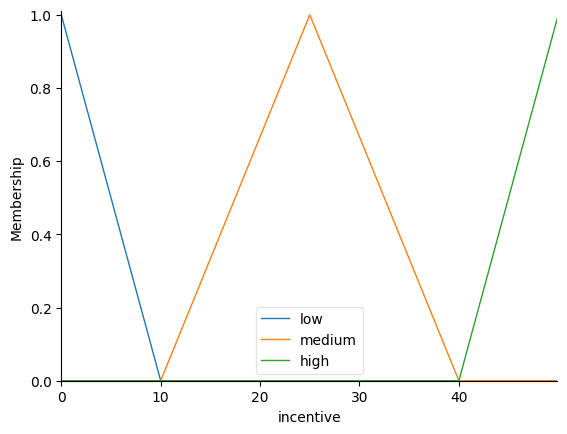

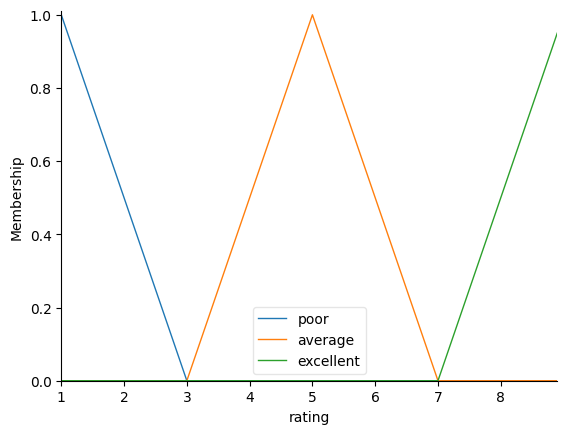

In [37]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic = ctrl.Antecedent(np.arange(0,10,0.1),'traffic')
distance=ctrl.Antecedent(np.arange(0,20,0.1),'distance')
weather=ctrl.Antecedent(np.arange(0,3,0.1),'weather')
prep_time=ctrl.Antecedent(np.arange(0,15,0.1),'prep_time')
fatigue = ctrl.Antecedent(np.arange(0,10,0.1),'fatigue')

delivery_time=ctrl.Consequent(np.arange(0,25,0.1),'delivery_time')
incentive=ctrl.Consequent(np.arange(0,50,0.1),'incentive')
rating=ctrl.Consequent(np.arange(1,9,0.1),'rating')


traffic['low']=fuzz.trimf(traffic.universe,[0,0,5])
traffic['medium']=fuzz.trimf(traffic.universe,[2.5,5,7.5])
traffic['high']=fuzz.trimf(traffic.universe,[5,10,10])
distance['short']=fuzz.trimf(distance.universe,[0,0,3])
distance['medium']=fuzz.trimf(distance.universe,[1.5,3,4.5])
distance['long']=fuzz.trimf(distance.universe,[3,8,8])
weather['clear']=fuzz.trimf(weather.universe,[0,0,1])
weather['rain']=fuzz.trimf(weather.universe,[0.5,1.5,2.5])
weather['storm']=fuzz.trimf(weather.universe,[2,3,3])
prep_time['slow']=fuzz.trimf(prep_time.universe,[0,0,5])
prep_time['medium']=fuzz.trimf(prep_time.universe,[2.5,5,7.5])
prep_time['fast']=fuzz.trimf(prep_time.universe,[5,10,10])
fatigue['low']=fuzz.trimf(fatigue.universe,[0,0,5])
fatigue['medium']=fuzz.trimf(fatigue.universe,[2.5,5,7.5])
fatigue['high']=fuzz.trimf(fatigue.universe,[5,10,10])
delivery_time['short']=fuzz.trimf(delivery_time.universe,[0,0,10])
delivery_time['medium']=fuzz.trimf(delivery_time.universe,[5,10,17.5])
delivery_time['long']=fuzz.trimf(delivery_time.universe,[17.5,25,25])
incentive['low']=fuzz.trimf(incentive.universe,[0,0,10])
incentive['medium']=fuzz.trimf(incentive.universe,[10,25,40])
incentive['high']=fuzz.trimf(incentive.universe,[40,50,50])
rating['poor']=fuzz.trimf(rating.universe,[1,1,3])
rating['average']=fuzz.trimf(rating.universe,[3,5,7])
rating['excellent']=fuzz.trimf(rating.universe,[7,9,9])

traffic.view()
distance.view()
weather.view()
prep_time.view()
fatigue.view()
prep_time.view()
fatigue.view()
delivery_time.view()
incentive.view()
rating.view()

thời gian dự kiến: 11.129629629629614
thưởng: 25.00000000000004
đánh giá: 3.5019607843137255


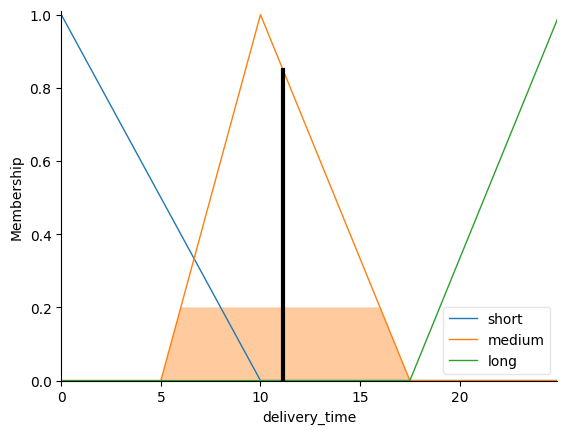

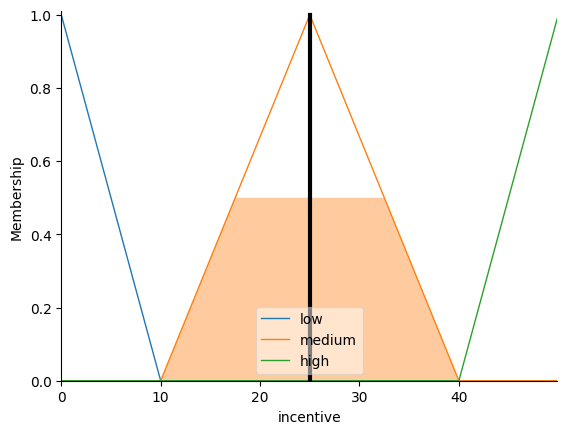

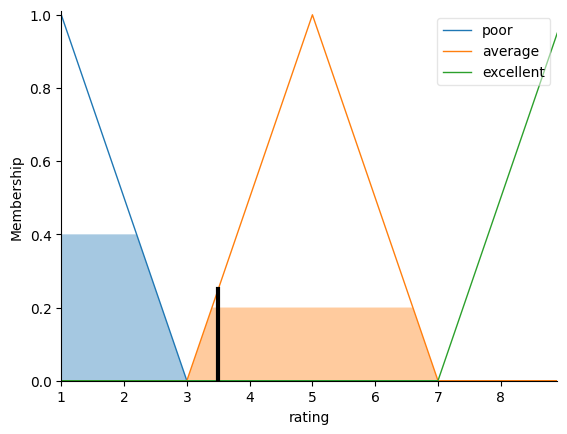

In [38]:
rule1=ctrl.Rule(traffic['low']&distance['short'],delivery_time['short'])
rule2=ctrl.Rule(traffic['medium']&distance['medium'],delivery_time['medium'])
rule3=ctrl.Rule(traffic['high']&distance['long'],delivery_time['long'])

rule4=ctrl.Rule(weather['clear'],incentive['low'])
rule5=ctrl.Rule(weather['rain'],incentive['medium'])
rule6=ctrl.Rule(weather['storm'],incentive['high'])

rule7=ctrl.Rule(prep_time['fast']&traffic['low'],delivery_time['short'])
rule8=ctrl.Rule(prep_time['medium']&traffic['medium'],delivery_time['medium'])
rule9=ctrl.Rule(prep_time['slow']&traffic['high'],delivery_time['long'])

rule10=ctrl.Rule(fatigue['low'],rating['excellent'])
rule11=ctrl.Rule(fatigue['medium'],rating['average'])
rule12=ctrl.Rule(fatigue['high'],rating['poor'])

rule13=ctrl.Rule(distance['long']&weather['storm']&traffic['high'],(delivery_time['long'],incentive['high']))
rule14=ctrl.Rule(distance['short']&weather['clear']&traffic['low'],(delivery_time['short'],incentive['low']))
rule15=ctrl.Rule(fatigue['high']&traffic['high'],(rating['poor'],delivery_time['medium']))

control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])

fuzzy_system=ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['traffic']=6
fuzzy_system.input['distance']=9
fuzzy_system.input['weather']=1
fuzzy_system.input['prep_time']=9
fuzzy_system.input['fatigue']=7
fuzzy_system.compute()
print('thời gian dự kiến:',fuzzy_system.output['delivery_time'])
print('thưởng:',fuzzy_system.output['incentive'])
print('đánh giá:',fuzzy_system.output['rating'])
delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)
